In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
'''
Use a dataset of emails and build a model that
can identify spam emails.
'''

'\nUse a dataset of emails and build a model that\ncan identify spam emails.\n'

In [ ]:
from google.colab import files
uploaded = files.upload()
type(uploaded)

Saving spam.csv to spam (1).csv


dict

Importing file data

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spam (1).csv']),encoding='ISO-8859-1')
print(df.head(5))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


Checking Data

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
#df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.dropna(axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Ham values

In [ ]:
ham=df.loc[df['v1'].str.contains('ham')]
ham_v1=ham.drop(['v2'],axis=1)
ham_v1.count()


v1    4825
dtype: int64

Spam Values

In [ ]:
spam=df.loc[df['v1'].str.contains('spam')]
spam_v1=spam.drop(['v2'],axis=1)
spam_v1.count()

v1    747
dtype: int64

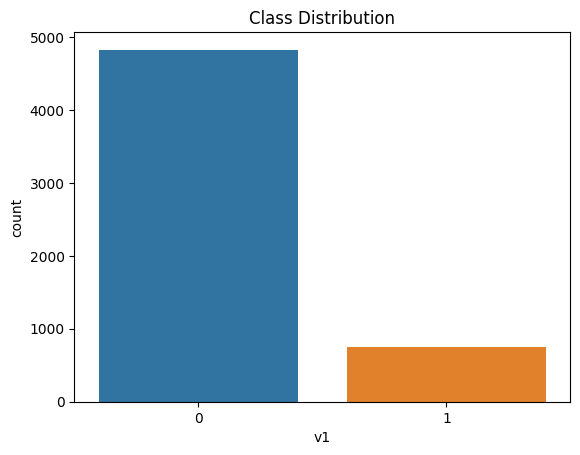

In [ ]:
sns.countplot(data=df,x=df['v1'])
plt.title('Spam vs Ham')
plt.show()  # ham is the major class, Spam is minor

In [ ]:
''' ham will be trasnformed into zero and spam will be transformed into one for machine learning'''
df=df.replace(['ham','spam'],[0,1])
df.v1

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

Count Vectorizer to extract feature

In [ ]:
'''https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/'''
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(df.v2)
#print("Vocabulary: ", vectorizer.vocabulary_)
vector = vectorizer.fit_transform(df.v2).toarray()

#print("Encoded Document is:")
#print(vector.toarray())


Support Vector Machine

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
x=vector
y=df.v1
svm = SVC(kernel="rbf", gamma=1, C=0.5)
svm.fit(x,y)


SVC(C=0.5, gamma=1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 0)
y_pred =svm.predict(xtest)

In [ ]:
confus_matrix=confusion_matrix(ytest, y_pred)
confus_matrix

array([[949,   0],
       [120,  46]])

In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, svm.predict(xtest)))
print (classification_report(ytest, svm.predict(xtest)))

Accuracy : 0.89238 


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       949
           1       1.00      0.28      0.43       166

    accuracy                           0.89      1115
   macro avg       0.94      0.64      0.69      1115
weighted avg       0.90      0.89      0.87      1115



Cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score
X=pd.DataFrame(x)
Y=pd.DataFrame(y)
accuracy = cross_val_score(svm, X.values, Y.values, scoring='accuracy',cv=3)
print(accuracy)

[0.87029064 0.86860528 0.86914378]
